In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read Data

In [2]:
taylor = pd.read_csv('Taylor_Train.csv', delimiter=',', encoding='ISO-8859-1')
taylor.head()

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour
0,Evansville,United States,Roberts Municipal Stadium,Gloriana\r\nKellie Pickler,"7,463 / 7,463","$360,617",Fearless_Tour
1,Jonesboro,United States,Convocation Center,Gloriana\r\nKellie Pickler,"7,822 / 7,822","$340,328",Fearless_Tour
2,St. Louis,United States,Scottrade Center,Gloriana\r\nKellie Pickler,"13,764 / 13,764","$650,420",Fearless_Tour
3,Alexandria,United States,Bishop Ireton High School,Gloriana\r\nKellie Pickler,,,Fearless_Tour
4,North Charleston,United States,North Charleston Coliseum,Gloriana\r\nKellie Pickler,"8,751 / 8,751","$398,154",Fearless_Tour


In [3]:
taylor.shape

(445, 7)

# Column Descriptions:


1) City: The name of the city where the concert took place.

2) Country: The name of the country where the city is located.

3) Venue: The name of the venue where the concert was held.

4) Opening act(s): The names of the artists or bands who performed as the opening act before the main performer(s).

5) Attendance (tickets sold / available): The number of tickets sold and the total number of tickets available for the concert.

6) Revenue: The revenue generated from ticket sales during the concert.

7) Tour: The name of the concert tour associated with the event.

# Data Preparation

## Clean Opening Act column

In [4]:
taylor['Opening act(s)'].unique()

array(['Gloriana\r\nKellie Pickler', '\x97', 'Kellie Pickler',
       'Justin Bieber', 'Gloriana',
       'Gloriana\r\nJustin Bieber\r\nKellie Pickler', 'Sezairi Sezali',
       'Sam Concepcion', 'Saito Johnny', 'Tom Dice', 'Martin & James',
       'Emma Marrone', 'The Bright', 'Ryan Sheridan', 'Needtobreathe',
       'Hot Chelle Rae', 'Ed Sheeran\r\nBrett Eldredge',
       'Ed Sheeran\r\nFlorida Georgia Line',
       'Ed Sheeran\r\nAustin Mahone\r\nBrett Eldredge',
       'Ed Sheeran\r\nAustin Mahone\r\nFlorida Georgia Line',
       'Ed Sheeran\r\nJoel Crouse',
       'Ed Sheeran\r\nAustin Mahone\r\nJoel Crouse',
       'Ed Sheeran\r\nCasey James',
       'Ed Sheeran\r\nAustin Mahone\r\nCasey James', 'Neon Trees',
       'Guy Sebastian\r\nNeon Trees', 'The Vamps', 'Andreas Bourani', nan,
       'CTS', 'Nicole Zefanya', 'Meg Bucsit', 'Imprompt-3', 'IamNeeta',
       'Vance Joy', 'Vance Joy\r\nShawn Mendes', 'James Bay',
       'Vance Joy\r\nShawn Mendes\r\nHaim', 'Vance Joy\r\nHaim',
 

In [5]:
print(taylor[taylor['Opening act(s)']=='\x97'])


                    City        Country                               Venue  \
7                 London        England              Shepherd's Bush Empire   
8                 London        England              Shepherd's Bush Empire   
18          New Brockton  United States                       BamaJam Farms   
21               Oshkosh  United States                  Ford Festival Park   
22                Cadott  United States        Amphitheatre Concert Grounds   
24              Edmonton         Canada                Commonwealth Stadium   
25                Craven         Canada                     Big Valley Park   
27            Twin Lakes  United States            Country Thunder Festival   
32                 Minot  United States  North Dakota State Fair Grandstand   
34         Detroit Lakes  United States                      Soo Pass Ranch   
36            Chelmsford        England                        Hylands Park   
37   Weston-under-Lizard        England             

In [6]:
taylor['Opening act(s)'] = taylor['Opening act(s)'].replace('\x97','No Opening Act(s)')

In [7]:
taylor['Opening act(s)'] = taylor['Opening act(s)'].str.replace('\r\n', ' and ')

In [8]:
taylor['Opening act(s)'] = taylor['Opening act(s)'].fillna("No Opening Act(s)")

In [9]:
taylor.head()

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour
0,Evansville,United States,Roberts Municipal Stadium,Gloriana and Kellie Pickler,"7,463 / 7,463","$360,617",Fearless_Tour
1,Jonesboro,United States,Convocation Center,Gloriana and Kellie Pickler,"7,822 / 7,822","$340,328",Fearless_Tour
2,St. Louis,United States,Scottrade Center,Gloriana and Kellie Pickler,"13,764 / 13,764","$650,420",Fearless_Tour
3,Alexandria,United States,Bishop Ireton High School,Gloriana and Kellie Pickler,,,Fearless_Tour
4,North Charleston,United States,North Charleston Coliseum,Gloriana and Kellie Pickler,"8,751 / 8,751","$398,154",Fearless_Tour


In [10]:
taylor['Opening act(s)'] = taylor['Opening act(s)'].str.replace(' and ', ', ')

In [11]:
taylor['Opening act(s)'].unique()

array(['Gloriana, Kellie Pickler', 'No Opening Act(s)', 'Kellie Pickler',
       'Justin Bieber', 'Gloriana',
       'Gloriana, Justin Bieber, Kellie Pickler', 'Sezairi Sezali',
       'Sam Concepcion', 'Saito Johnny', 'Tom Dice', 'Martin & James',
       'Emma Marrone', 'The Bright', 'Ryan Sheridan', 'Needtobreathe',
       'Hot Chelle Rae', 'Ed Sheeran, Brett Eldredge',
       'Ed Sheeran, Florida Georgia Line',
       'Ed Sheeran, Austin Mahone, Brett Eldredge',
       'Ed Sheeran, Austin Mahone, Florida Georgia Line',
       'Ed Sheeran, Joel Crouse',
       'Ed Sheeran, Austin Mahone, Joel Crouse',
       'Ed Sheeran, Casey James',
       'Ed Sheeran, Austin Mahone, Casey James', 'Neon Trees',
       'Guy Sebastian, Neon Trees', 'The Vamps', 'Andreas Bourani', 'CTS',
       'Nicole Zefanya', 'Meg Bucsit', 'Imprompt-3', 'IamNeeta',
       'Vance Joy', 'Vance Joy, Shawn Mendes', 'James Bay',
       'Vance Joy, Shawn Mendes, Haim', 'Vance Joy, Haim',
       'Camila Cabello, Charli XC

# Copy dataset

In [12]:
taylor_df = taylor.copy()

In [13]:
taylor_df.head()

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour
0,Evansville,United States,Roberts Municipal Stadium,"Gloriana, Kellie Pickler","7,463 / 7,463","$360,617",Fearless_Tour
1,Jonesboro,United States,Convocation Center,"Gloriana, Kellie Pickler","7,822 / 7,822","$340,328",Fearless_Tour
2,St. Louis,United States,Scottrade Center,"Gloriana, Kellie Pickler","13,764 / 13,764","$650,420",Fearless_Tour
3,Alexandria,United States,Bishop Ireton High School,"Gloriana, Kellie Pickler",,,Fearless_Tour
4,North Charleston,United States,North Charleston Coliseum,"Gloriana, Kellie Pickler","8,751 / 8,751","$398,154",Fearless_Tour


In [14]:
taylor_df['Number of Opening Act(s)'] = taylor_df['Opening act(s)'].str.count('and') + 1

In [15]:
taylor_df.head()

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour,Number of Opening Act(s)
0,Evansville,United States,Roberts Municipal Stadium,"Gloriana, Kellie Pickler","7,463 / 7,463","$360,617",Fearless_Tour,1
1,Jonesboro,United States,Convocation Center,"Gloriana, Kellie Pickler","7,822 / 7,822","$340,328",Fearless_Tour,1
2,St. Louis,United States,Scottrade Center,"Gloriana, Kellie Pickler","13,764 / 13,764","$650,420",Fearless_Tour,1
3,Alexandria,United States,Bishop Ireton High School,"Gloriana, Kellie Pickler",,,Fearless_Tour,1
4,North Charleston,United States,North Charleston Coliseum,"Gloriana, Kellie Pickler","8,751 / 8,751","$398,154",Fearless_Tour,1


## Check Duplicates
#### I combined city, country, venue, and tour to see if there are any duplicates. and yes there are 116 duplicates
#### I will drop it anyway because there are no other variable to prove that there are no duplication, such as concert date (since 1 city & 1 venue could get more than one date)


In [16]:
taylor_df['UniqueCombined'] = taylor_df['City'].str.cat([taylor_df['Country'], taylor_df['Venue'], taylor_df['Tour']], sep=',')

In [17]:
duplicate_rows = taylor_df[taylor_df['UniqueCombined'].duplicated(keep=False)]
duplicate_rows

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour,Number of Opening Act(s),UniqueCombined
7,London,England,Shepherd's Bush Empire,No Opening Act(s),"6,789 / 6,789","$401,328",Fearless_Tour,1,"London,England,Shepherd's Bush Empire,Fearless..."
8,London,England,Shepherd's Bush Empire,No Opening Act(s),"6,789 / 6,789","$401,328",Fearless_Tour,1,"London,England,Shepherd's Bush Empire,Fearless..."
14,Los Angeles,United States,Staples Center,"Gloriana, Kellie Pickler","13,648 / 13,648","$720,940",Fearless_Tour,1,"Los Angeles,United States,Staples Center,Fearl..."
49,Dallas,United States,American Airlines Center,"Gloriana, Kellie Pickler","13,794 / 13,794","$628,062",Fearless_Tour,1,"Dallas,United States,American Airlines Center,..."
56,Rosemont,United States,Allstate Arena,"Gloriana, Kellie Pickler","26,265 / 26,265","$1,150,896",Fearless_Tour,1,"Rosemont,United States,Allstate Arena,Fearless..."
...,...,...,...,...,...,...,...,...,...
430,Minneapolis,United States,U.S. Bank Stadium,"Camila Cabello, Charli XCX","98,774 / 98,774","$10,242,024",Reputation_Stadium_Tour,1,"Minneapolis,United States,U.S. Bank Stadium,Re..."
436,Arlington,United States,AT&T Stadium,"Camila Cabello, Charli XCX","105,002 / 105,002","$15,006,157",Reputation_Stadium_Tour,1,"Arlington,United States,AT&T Stadium,Reputatio..."
437,Arlington,United States,AT&T Stadium,"Camila Cabello, Charli XCX","105,002 / 105,002","$15,006,157",Reputation_Stadium_Tour,1,"Arlington,United States,AT&T Stadium,Reputatio..."
443,Tokyo,Japan,Tokyo Dome,Charli XCX,"100,109 / 100,109","$14,859,847",Reputation_Stadium_Tour,1,"Tokyo,Japan,Tokyo Dome,Reputation_Stadium_Tour"


In [18]:
taylor_df.drop_duplicates(subset=['UniqueCombined'], inplace=True)

In [19]:
taylor_df.head()

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour,Number of Opening Act(s),UniqueCombined
0,Evansville,United States,Roberts Municipal Stadium,"Gloriana, Kellie Pickler","7,463 / 7,463","$360,617",Fearless_Tour,1,"Evansville,United States,Roberts Municipal Sta..."
1,Jonesboro,United States,Convocation Center,"Gloriana, Kellie Pickler","7,822 / 7,822","$340,328",Fearless_Tour,1,"Jonesboro,United States,Convocation Center,Fea..."
2,St. Louis,United States,Scottrade Center,"Gloriana, Kellie Pickler","13,764 / 13,764","$650,420",Fearless_Tour,1,"St. Louis,United States,Scottrade Center,Fearl..."
3,Alexandria,United States,Bishop Ireton High School,"Gloriana, Kellie Pickler",,,Fearless_Tour,1,"Alexandria,United States,Bishop Ireton High Sc..."
4,North Charleston,United States,North Charleston Coliseum,"Gloriana, Kellie Pickler","8,751 / 8,751","$398,154",Fearless_Tour,1,"North Charleston,United States,North Charlesto..."


In [20]:
taylor_df['UniqueCombined'].duplicated().sum()

0

In [21]:
taylor_df.isnull().sum()

City                                     0
Country                                  0
Venue                                    0
Opening act(s)                           0
Attendance (tickets sold / available)    0
Revenue                                  0
Tour                                     0
Number of Opening Act(s)                 0
UniqueCombined                           0
dtype: int64

## Clean Venue Column

In [22]:
taylor_df['Venue'].unique()

array(['Roberts Municipal Stadium', 'Convocation Center',
       'Scottrade Center', 'Bishop Ireton High School',
       'North Charleston Coliseum',
       'Jacksonville Veterans Memorial Arena',
       'Mississippi Coast Coliseum', "Shepherd's Bush Empire",
       'Spokane Arena', 'KeyArena', 'Rose Garden Arena', 'Ford Arena',
       'Jobing.com Arena', 'Staples Center', 'Mandalay Bay Events Center',
       'Valley View Casino Center', 'EnergySolutions Arena',
       'BamaJam Farms', 'Merriweather Post Pavilion',
       'Greensboro Coliseum', 'Ford Festival Park',
       'Amphitheatre Concert Grounds', 'Pengrowth Saddledome',
       'Commonwealth Stadium', 'Big Valley Park', 'MTS Centre',
       'Country Thunder Festival', 'Value City Arena',
       'Charleston Civic Center', 'Cheyenne Frontier Days Arena',
       'Barnett Arena', 'North Dakota State Fair Grandstand',
       'Wachovia Spectrum', 'Soo Pass Ranch', 'Qwest Center Omaha',
       'Hylands Park', 'Weston Park', 'Madison Sq

In [23]:
taylor_df['Venue'] = taylor['Venue'].str.replace('\x96', ' ')

In [24]:
taylor_df['Venue'].unique()

array(['Roberts Municipal Stadium', 'Convocation Center',
       'Scottrade Center', 'Bishop Ireton High School',
       'North Charleston Coliseum',
       'Jacksonville Veterans Memorial Arena',
       'Mississippi Coast Coliseum', "Shepherd's Bush Empire",
       'Spokane Arena', 'KeyArena', 'Rose Garden Arena', 'Ford Arena',
       'Jobing.com Arena', 'Staples Center', 'Mandalay Bay Events Center',
       'Valley View Casino Center', 'EnergySolutions Arena',
       'BamaJam Farms', 'Merriweather Post Pavilion',
       'Greensboro Coliseum', 'Ford Festival Park',
       'Amphitheatre Concert Grounds', 'Pengrowth Saddledome',
       'Commonwealth Stadium', 'Big Valley Park', 'MTS Centre',
       'Country Thunder Festival', 'Value City Arena',
       'Charleston Civic Center', 'Cheyenne Frontier Days Arena',
       'Barnett Arena', 'North Dakota State Fair Grandstand',
       'Wachovia Spectrum', 'Soo Pass Ranch', 'Qwest Center Omaha',
       'Hylands Park', 'Weston Park', 'Madison Sq

In [25]:
taylor_df.shape

(329, 9)

## 2. Remove underscore from tour title

In [26]:
taylor_df['Tour'] = taylor_df['Tour'].str.replace('_',' ')

In [27]:
taylor_df.head()

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour,Number of Opening Act(s),UniqueCombined
0,Evansville,United States,Roberts Municipal Stadium,"Gloriana, Kellie Pickler","7,463 / 7,463","$360,617",Fearless Tour,1,"Evansville,United States,Roberts Municipal Sta..."
1,Jonesboro,United States,Convocation Center,"Gloriana, Kellie Pickler","7,822 / 7,822","$340,328",Fearless Tour,1,"Jonesboro,United States,Convocation Center,Fea..."
2,St. Louis,United States,Scottrade Center,"Gloriana, Kellie Pickler","13,764 / 13,764","$650,420",Fearless Tour,1,"St. Louis,United States,Scottrade Center,Fearl..."
3,Alexandria,United States,Bishop Ireton High School,"Gloriana, Kellie Pickler",,,Fearless Tour,1,"Alexandria,United States,Bishop Ireton High Sc..."
4,North Charleston,United States,North Charleston Coliseum,"Gloriana, Kellie Pickler","8,751 / 8,751","$398,154",Fearless Tour,1,"North Charleston,United States,North Charlesto..."


## 3. Splitting Attendance (tickets sold / available) column into two separate columns

In [28]:
taylor_df[['Ticket Sold', 'Ticket Available']] = taylor_df['Attendance (tickets sold / available)'].str.split('/', expand=True)

In [29]:
taylor_df = taylor_df.drop('Attendance (tickets sold / available)', axis=1)

In [30]:
taylor_df.head()

,City,Country,Venue,Opening act(s),Revenue,Tour,Number of Opening Act(s),UniqueCombined,Ticket Sold,Ticket Available
0,Evansville,United States,Roberts Municipal Stadium,"Gloriana, Kellie Pickler","$360,617",Fearless Tour,1,"Evansville,United States,Roberts Municipal Sta...","7,463","7,463"
1,Jonesboro,United States,Convocation Center,"Gloriana, Kellie Pickler","$340,328",Fearless Tour,1,"Jonesboro,United States,Convocation Center,Fea...","7,822","7,822"
2,St. Louis,United States,Scottrade Center,"Gloriana, Kellie Pickler","$650,420",Fearless Tour,1,"St. Louis,United States,Scottrade Center,Fearl...","13,764","13,764"
3,Alexandria,United States,Bishop Ireton High School,"Gloriana, Kellie Pickler",,Fearless Tour,1,"Alexandria,United States,Bishop Ireton High Sc...",,None
4,North Charleston,United States,North Charleston Coliseum,"Gloriana, Kellie Pickler","$398,154",Fearless Tour,1,"North Charleston,United States,North Charlesto...","8,751","8,751"


In [31]:
# taylor_df = taylor_df.drop('UniqueCombined', axis=1)

In [32]:
taylor_df.head()

,City,Country,Venue,Opening act(s),Revenue,Tour,Number of Opening Act(s),UniqueCombined,Ticket Sold,Ticket Available
0,Evansville,United States,Roberts Municipal Stadium,"Gloriana, Kellie Pickler","$360,617",Fearless Tour,1,"Evansville,United States,Roberts Municipal Sta...","7,463","7,463"
1,Jonesboro,United States,Convocation Center,"Gloriana, Kellie Pickler","$340,328",Fearless Tour,1,"Jonesboro,United States,Convocation Center,Fea...","7,822","7,822"
2,St. Louis,United States,Scottrade Center,"Gloriana, Kellie Pickler","$650,420",Fearless Tour,1,"St. Louis,United States,Scottrade Center,Fearl...","13,764","13,764"
3,Alexandria,United States,Bishop Ireton High School,"Gloriana, Kellie Pickler",,Fearless Tour,1,"Alexandria,United States,Bishop Ireton High Sc...",,None
4,North Charleston,United States,North Charleston Coliseum,"Gloriana, Kellie Pickler","$398,154",Fearless Tour,1,"North Charleston,United States,North Charlesto...","8,751","8,751"


## Dealing with datatypes

In [33]:
taylor_df.dtypes

City                        object
Country                     object
Venue                       object
Opening act(s)              object
Revenue                     object
Tour                        object
Number of Opening Act(s)     int64
UniqueCombined              object
Ticket Sold                 object
Ticket Available            object
dtype: object

## 4. Remove dollar sign

In [34]:
taylor_df[['$', 'Revenue']] = taylor_df['Revenue'].str.split('$', expand=True)

In [35]:
taylor_df = taylor_df.drop('$', axis=1)

In [36]:
taylor_df.head()

,City,Country,Venue,Opening act(s),Revenue,Tour,Number of Opening Act(s),UniqueCombined,Ticket Sold,Ticket Available
0,Evansville,United States,Roberts Municipal Stadium,"Gloriana, Kellie Pickler","360,617",Fearless Tour,1,"Evansville,United States,Roberts Municipal Sta...","7,463","7,463"
1,Jonesboro,United States,Convocation Center,"Gloriana, Kellie Pickler","340,328",Fearless Tour,1,"Jonesboro,United States,Convocation Center,Fea...","7,822","7,822"
2,St. Louis,United States,Scottrade Center,"Gloriana, Kellie Pickler","650,420",Fearless Tour,1,"St. Louis,United States,Scottrade Center,Fearl...","13,764","13,764"
3,Alexandria,United States,Bishop Ireton High School,"Gloriana, Kellie Pickler",None,Fearless Tour,1,"Alexandria,United States,Bishop Ireton High Sc...",,None
4,North Charleston,United States,North Charleston Coliseum,"Gloriana, Kellie Pickler","398,154",Fearless Tour,1,"North Charleston,United States,North Charlesto...","8,751","8,751"


In [37]:
taylor_df.isnull().sum()

City                         0
Country                      0
Venue                        0
Opening act(s)               0
Revenue                     36
Tour                         0
Number of Opening Act(s)     0
UniqueCombined               0
Ticket Sold                  0
Ticket Available            35
dtype: int64

In [38]:
taylor_df['UniqueCombined'].duplicated().sum()

0

In [39]:
taylor_df.shape

(329, 10)

## 5. Remove comma from values in Revenue, Ticket Sold, & Ticket Available

In [40]:
def removecomma(df, col):
  df[col] = df[col].str.replace(',','')
  return df

In [41]:
taylor_df = removecomma(taylor_df,'Revenue')

In [42]:
taylor_df = removecomma(taylor_df, 'Ticket Sold')
taylor_df = removecomma(taylor_df, 'Ticket Available')

In [43]:
taylor_df.head()

,City,Country,Venue,Opening act(s),Revenue,Tour,Number of Opening Act(s),UniqueCombined,Ticket Sold,Ticket Available
0,Evansville,United States,Roberts Municipal Stadium,"Gloriana, Kellie Pickler",360617,Fearless Tour,1,"Evansville,United States,Roberts Municipal Sta...",7463,7463
1,Jonesboro,United States,Convocation Center,"Gloriana, Kellie Pickler",340328,Fearless Tour,1,"Jonesboro,United States,Convocation Center,Fea...",7822,7822
2,St. Louis,United States,Scottrade Center,"Gloriana, Kellie Pickler",650420,Fearless Tour,1,"St. Louis,United States,Scottrade Center,Fearl...",13764,13764
3,Alexandria,United States,Bishop Ireton High School,"Gloriana, Kellie Pickler",None,Fearless Tour,1,"Alexandria,United States,Bishop Ireton High Sc...",,None
4,North Charleston,United States,North Charleston Coliseum,"Gloriana, Kellie Pickler",398154,Fearless Tour,1,"North Charleston,United States,North Charlesto...",8751,8751


## 6. Change Data Type for Revenue, Ticket Sold, & Ticket Available

In [44]:
taylor_df.dtypes

City                        object
Country                     object
Venue                       object
Opening act(s)              object
Revenue                     object
Tour                        object
Number of Opening Act(s)     int64
UniqueCombined              object
Ticket Sold                 object
Ticket Available            object
dtype: object

In [45]:
taylor_df['Revenue'].unique()

array(['360617', '340328', '650420', None, '398154', '507012', '437313',
       '401328', '482146', '528637', '613284', '413622', '647923',
       '720940', '551051', '502689', '555207', '608438', '690959',
       '2540906', '512487', '976062', '296306', '642387', '628062',
       '654089', '743492', '634876', '1150896', '623975', '956505',
       '2030640', '555396', '1627510', '585352', '793049', '598581',
       '777442', '642705', '501169', '2002321', '664305', '1711591',
       '645592', '675184', '610801', '761110', '1497135', '649488',
       '716726', '1024223', '755475', '752303', '738280', '846111',
       '610668', '1742669', '1713529', '873206', '2497690', '1290926',
       '1824743', '3726157', '916850', '385374', '758113', '1738227',
       '859037', '1030633', '219212', '248314', '815246', '370028',
       '153303', '201781', '251864', '508854', '379001', '419806',
       '580558', '891152', '1717104', '862771', '1582951', '791980',
       '955259', '897042', '3453549', 

## Clean Revenue column because there is still "None" value

In [46]:
# Convert 'Revenue' column to numeric format
taylor_df['Revenue'] = pd.to_numeric(taylor_df['Revenue'], errors='coerce')

# Calculate the mean of non-None values
mean_revenue = taylor_df['Revenue'].mean()

# Replace None (or NaN) values with the mean
taylor_df['Revenue'].fillna(mean_revenue, inplace=True)

In [47]:
taylor_df['Revenue'].unique()

array([  360617.        ,   340328.        ,   650420.        ,
        3161537.20136519,   398154.        ,   507012.        ,
         437313.        ,   401328.        ,   482146.        ,
         528637.        ,   613284.        ,   413622.        ,
         647923.        ,   720940.        ,   551051.        ,
         502689.        ,   555207.        ,   608438.        ,
         690959.        ,  2540906.        ,   512487.        ,
         976062.        ,   296306.        ,   642387.        ,
         628062.        ,   654089.        ,   743492.        ,
         634876.        ,  1150896.        ,   623975.        ,
         956505.        ,  2030640.        ,   555396.        ,
        1627510.        ,   585352.        ,   793049.        ,
         598581.        ,   777442.        ,   642705.        ,
         501169.        ,  2002321.        ,   664305.        ,
        1711591.        ,   645592.        ,   675184.        ,
         610801.        ,   761110.     

In [48]:
taylor_df['Ticket Available'] = pd.to_numeric(taylor_df['Ticket Available'], errors='coerce')

In [49]:
fill_ava = taylor_df['Ticket Available'].mean()
taylor_df['Ticket Available'].fillna(fill_ava, inplace=True)

In [50]:
taylor_df['Ticket Sold'].unique()

array(['7463 ', '7822 ', '13764 ', '\x97', '8751 ', '11072 ', '9436 ',
       '6789 ', '10798 ', '12061 ', '13226 ', '8970 ', '13052 ', '13648 ',
       '8311 ', '10174 ', '13042 ', '17619 ', '14641 ', '33910 ',
       '11369 ', '13597 ', '7507 ', '14269 ', '13794 ', '13978 ',
       '15524 ', '13373 ', '26265 ', '13563 ', '11334 ', '27030 ',
       '7180 ', '23493 ', '9066 ', '13861 ', '11101 ', '13453 ', '11928 ',
       '8423 ', '30360 ', '11858 ', '29125 ', '11208 ', '11795 ',
       '13781 ', '25991 ', '11706 ', '12744 ', '17966 ', '13429 ',
       '13895 ', '13264 ', '14914 ', '10641 ', '26065 ', '25831 ',
       '13376 ', '30458 ', '27290 ', '56868 ', '35000 ', '8964 ', '4725 ',
       '6953 ', '15955 ', '12667 ', '12573 ', '4622 ', '4799 ', '8650 ',
       '6082 ', '3421 ', '3598 ', '3962 ', '9339 ', '8058 ', '8681 ',
       '10488 ', '15265 ', '26992 ', '13149 ', '24077 ', '12262 ',
       '14817 ', '13748 ', '47992 ', '28977 ', '52009 ', '14487 ',
       '12436 ', '110800 ', 

In [51]:
count_weird = taylor_df['Ticket Sold']=='\x97'
count_weird.value_counts()

False    294
True      35
Name: Ticket Sold, dtype: int64

In [52]:
taylor_df['Ticket Sold'] = pd.to_numeric(taylor_df['Ticket Sold'], errors='coerce')

In [53]:
fill_sold = taylor_df['Ticket Sold'].mean()
taylor_df['Ticket Sold'].fillna(fill_sold, inplace=True)

In [54]:
count_weird = taylor_df['Ticket Sold']=='\x97'
count_weird.value_counts()

False    329
Name: Ticket Sold, dtype: int64

In [55]:
taylor_df['Ticket Sold'].isnull().sum()

0

In [56]:
taylor_df.head()

,City,Country,Venue,Opening act(s),Revenue,Tour,Number of Opening Act(s),UniqueCombined,Ticket Sold,Ticket Available
0,Evansville,United States,Roberts Municipal Stadium,"Gloriana, Kellie Pickler",3.606170e+05,Fearless Tour,1,"Evansville,United States,Roberts Municipal Sta...",7463.000000,7463.000000
1,Jonesboro,United States,Convocation Center,"Gloriana, Kellie Pickler",3.403280e+05,Fearless Tour,1,"Jonesboro,United States,Convocation Center,Fea...",7822.000000,7822.000000
2,St. Louis,United States,Scottrade Center,"Gloriana, Kellie Pickler",6.504200e+05,Fearless Tour,1,"St. Louis,United States,Scottrade Center,Fearl...",13764.000000,13764.000000
3,Alexandria,United States,Bishop Ireton High School,"Gloriana, Kellie Pickler",3.161537e+06,Fearless Tour,1,"Alexandria,United States,Bishop Ireton High Sc...",32389.639456,32454.965986
4,North Charleston,United States,North Charleston Coliseum,"Gloriana, Kellie Pickler",3.981540e+05,Fearless Tour,1,"North Charleston,United States,North Charlesto...",8751.000000,8751.000000


In [57]:
pd.options.display.float_format = '{:.2f}'.format

In [58]:
taylor_df.isnull().sum()

City                        0
Country                     0
Venue                       0
Opening act(s)              0
Revenue                     0
Tour                        0
Number of Opening Act(s)    0
UniqueCombined              0
Ticket Sold                 0
Ticket Available            0
dtype: int64

In [59]:
taylor_df.dtypes

City                         object
Country                      object
Venue                        object
Opening act(s)               object
Revenue                     float64
Tour                         object
Number of Opening Act(s)      int64
UniqueCombined               object
Ticket Sold                 float64
Ticket Available            float64
dtype: object

In [60]:
taylor_df = taylor_df.drop('UniqueCombined', axis=1)

## Create Another Dataframe with .explode() method on Opening Act column
##### because i want to see something in "Does opening acts affecting Revenue?"

In [61]:
taylor_df_2 = taylor_df.copy()

In [62]:
taylor_df_2['Opening act(s)'] = taylor_df_2['Opening act(s)'].str.split(', ')

# Explode the DataFrame to create separate rows for each opening act
taylor_df_2 = taylor_df_2.explode('Opening act(s)')

# Group the DataFrame by opening act and calculate the total revenue for each opening act
revenue_by_opening_act = taylor_df_2.groupby('Opening act(s)')['Revenue'].sum()

In [63]:
taylor_df_2 = taylor_df_2.drop('Number of Opening Act(s)',axis=1)

In [64]:
taylor_df_2['UniqueCombined'] = taylor_df_2['City'].str.cat([taylor_df_2['Country'], taylor_df_2['Venue'], taylor_df_2['Tour'], taylor_df_2['Opening act(s)']], sep=',')

In [65]:
taylor_df_2.drop_duplicates(subset=['UniqueCombined'], inplace=True)

In [66]:
taylor_df_2 = taylor_df_2.drop('UniqueCombined',axis=1)

In [67]:
taylor_df_2 = taylor_df_2.reset_index()

In [68]:
taylor_df_2 = taylor_df_2.drop('index',axis=1)

In [69]:
taylor_df_2.head()

,City,Country,Venue,Opening act(s),Revenue,Tour,Ticket Sold,Ticket Available
0,Evansville,United States,Roberts Municipal Stadium,Gloriana,360617.00,Fearless Tour,7463.00,7463.00
1,Evansville,United States,Roberts Municipal Stadium,Kellie Pickler,360617.00,Fearless Tour,7463.00,7463.00
2,Jonesboro,United States,Convocation Center,Gloriana,340328.00,Fearless Tour,7822.00,7822.00
3,Jonesboro,United States,Convocation Center,Kellie Pickler,340328.00,Fearless Tour,7822.00,7822.00
4,St. Louis,United States,Scottrade Center,Gloriana,650420.00,Fearless Tour,13764.00,13764.00


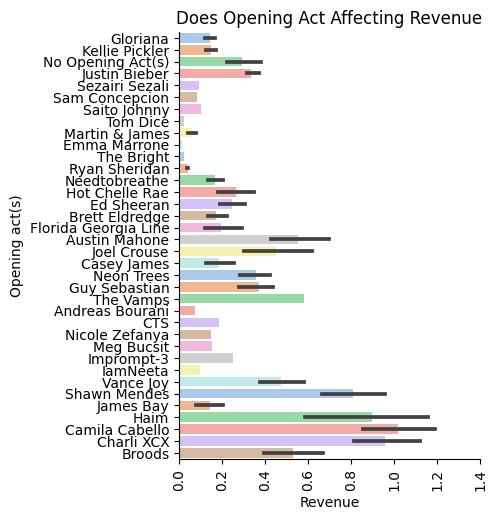

In [70]:
sns.catplot(data=taylor_df_2, y="Opening act(s)", x="Revenue", kind="bar", palette="pastel").set(title="Does Opening Act Affecting Revenue").set_xticklabels(rotation=90)

# ✨Exploratory Data Analysis

## Opening Act(s) for each tour

##### Out of curiosity I check out opening acts for each tours

In [78]:
fearless = taylor_df_2[taylor_df_2['Tour']=="Fearless Tour"]
speaknow = taylor_df_2[taylor_df_2['Tour']=="Speak Now World Tour"]
red = taylor_df_2[taylor_df_2['Tour']=="The Red Tour"]
the1989 = taylor_df_2[taylor_df_2['Tour']=="The 1989 World Tour"]
reputation = taylor_df_2[taylor_df_2['Tour']=="Reputation Stadium Tour"]

In [79]:
speaknow.head()

,City,Country,Venue,Opening act(s),Revenue,Tour,Ticket Sold,Ticket Available
171,Singapore,Singapore,Singapore Indoor Stadium,Sezairi Sezali,916850.00,Speak Now World Tour,8964.00,8964.00
172,Seoul,South Korea,Olympic Gymnastics Arena,No Opening Act(s),385374.00,Speak Now World Tour,4725.00,4725.00
173,Osaka,Japan,Osaka-Jo Hall,No Opening Act(s),758113.00,Speak Now World Tour,6953.00,6953.00
174,Tokyo,Japan,Nippon Budokan,No Opening Act(s),1738227.00,Speak Now World Tour,15955.00,15955.00
175,Quezon City,Philippines,Smart Araneta Coliseum,Sam Concepcion,859037.00,Speak Now World Tour,12667.00,12667.00


I tried weighted aggregation to maintain a sense of proportionality in the ticket sales while accounting for the duplicated rows created by .explode()

In [80]:
# Assuming taylor_df is the dataframe after using .explode()
# Group by Tour and Opening_Act and calculate weighted average of Ticket Sold
weighted_aggregated_data = taylor_df_2.groupby(['Tour', 'Opening act(s)'])['Ticket Sold'].sum().reset_index()

# Calculate the weights for each Opening_Act
weights = taylor_df_2.groupby(['Tour', 'Opening act(s)'])['Opening act(s)'].transform('count')

# Calculate the weighted average
weighted_aggregated_data['Weighted_Avg_Ticket_Sold'] = (weighted_aggregated_data['Ticket Sold'] * weights) / weights.sum()

# Find the most popular opening act on each tour based on weighted average ticket sales
most_popular_per_tour = weighted_aggregated_data.groupby('Tour').apply(lambda x: x.nlargest(1, 'Weighted_Avg_Ticket_Sold')).reset_index(drop=True)

In [81]:
print(most_popular_per_tour)

                      Tour Opening act(s)  Ticket Sold  \
0            Fearless Tour       Gloriana   1546627.15   
1  Reputation Stadium Tour     Charli XCX   2888916.00   
2     Speak Now World Tour  Needtobreathe   1358454.00   
3      The 1989 World Tour      Vance Joy   2082657.00   
4             The Red Tour     Ed Sheeran   1363510.00   

   Weighted_Avg_Ticket_Sold  
0                   5245.50  
1                   9797.98  
2                   4607.30  
3                   6705.85  
4                   4390.30  


In [82]:
# Calculate the total show for each opening act within each tour
show_counts = taylor_df_2.groupby(['Tour', 'Opening act(s)'])['Opening act(s)'].size().reset_index(name='Total Shows')

# Calculate the total ticket sold for each opening act within each tour
total_ticket_sold = taylor_df_2.groupby(['Tour', 'Opening act(s)'])['Ticket Sold'].sum().reset_index()

# Merge the total show and total ticket sold dataframes
result = pd.merge(total_ticket_sold, show_counts, on=['Tour', 'Opening act(s)'])

# Calculate the weighted average for each opening act within each tour
result['Weighted_Avg'] = (result['Ticket Sold'] * result['Total Shows']) / result.groupby('Tour')['Total Shows'].transform('sum')

# Display the result
result.sort_values(by=['Tour', 'Weighted_Avg'], ascending=[True, False])

,Tour,Opening act(s),Ticket Sold,Total Shows,Weighted_Avg
0,Fearless Tour,Gloriana,1546627.15,79,714523.65
2,Fearless Tour,Kellie Pickler,1500913.79,75,658295.52
3,Fearless Tour,No Opening Act(s),431985.03,14,35367.20
1,Fearless Tour,Justin Bieber,121647.28,3,2134.16
6,Reputation Stadium Tour,Charli XCX,2888916.00,36,1485728.23
5,Reputation Stadium Tour,Camila Cabello,2466407.00,29,1021797.19
4,Reputation Stadium Tour,Broods,266379.00,5,19027.07
10,Speak Now World Tour,Needtobreathe,1358454.00,58,960857.71
8,Speak Now World Tour,Hot Chelle Rae,137879.00,6,10088.71
11,Speak Now World Tour,No Opening Act(s),39881.00,5,2431.77


In [83]:
most_popular_per_tour = result.groupby('Tour').apply(lambda x: x.nlargest(1, 'Weighted_Avg')).reset_index(drop=True)
most_popular_per_tour

,Tour,Opening act(s),Ticket Sold,Total Shows,Weighted_Avg
0,Fearless Tour,Gloriana,1546627.15,79,714523.65
1,Reputation Stadium Tour,Charli XCX,2888916.00,36,1485728.23
2,Speak Now World Tour,Needtobreathe,1358454.00,58,960857.71
3,The 1989 World Tour,Vance Joy,2082657.00,48,1265411.85
4,The Red Tour,Ed Sheeran,1363510.00,47,529627.85


#### **Fearless (Apr 23, 2009 – Jul 10, 2010)**


In [84]:
weighted_fearless = fearless.groupby(['Opening act(s)'])['Ticket Sold'].sum().reset_index()

# Calculate the weights for each Opening_Act
weights_fearless = fearless.groupby(['Opening act(s)'])['Opening act(s)'].transform('count')

# Calculate the weighted average
weighted_fearless['Weighted_Avg_Ticket_Sold'] = (weighted_fearless['Ticket Sold'] * weights_fearless) / weights_fearless.sum()

# Find the most popular opening act on each tour based on weighted average ticket sales
most_popular_fearless = weighted_fearless.groupby('Opening act(s)').apply(lambda x: x.nlargest(1, 'Weighted_Avg_Ticket_Sold')).reset_index(drop=True)
print(most_popular_fearless)

      Opening act(s)  Ticket Sold  Weighted_Avg_Ticket_Sold
0           Gloriana   1546627.15                  10122.07
1      Justin Bieber    121647.28                    755.82
2     Kellie Pickler   1500913.79                   9822.90
3  No Opening Act(s)    431985.03                   2684.03


<ipython-input-84-d43e18d13de4>:10: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  most_popular_fearless = weighted_fearless.groupby('Opening act(s)').apply(lambda x: x.nlargest(1, 'Weighted_Avg_Ticket_Sold')).reset_index(drop=True)


In [85]:
show_counts = fearless['Opening act(s)'].value_counts().reset_index()
show_counts.columns = ['Opening act(s)', 'Total Shows']

# Calculate the total ticket sold for each opening act
total_ticket_sold = fearless.groupby('Opening act(s)')['Ticket Sold'].sum().reset_index()

# Merge the total show and total ticket sold dataframes
result = pd.merge(total_ticket_sold, show_counts, on='Opening act(s)')

# Calculate the weighted average for each opening act
result['Weighted_Avg'] = (result['Ticket Sold'] * result['Total Shows']) / result['Total Shows'].sum()

# Display the result
print(result)

      Opening act(s)  Ticket Sold  Total Shows  Weighted_Avg
0           Gloriana   1546627.15           79     714523.65
1      Justin Bieber    121647.28            3       2134.16
2     Kellie Pickler   1500913.79           75     658295.52
3  No Opening Act(s)    431985.03           14      35367.20


Gloriana is the most popular because she opened the most shows on Fearless Tour in North America and Oceania

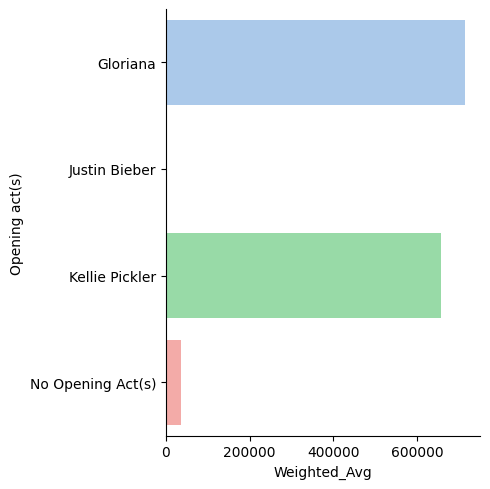

In [86]:
sns.catplot(data=result, y="Opening act(s)", x="Weighted_Avg", kind="bar", palette="pastel")

#### **Speak Now (Feb 9, 2011 - Mar 18, 2012)**

In [87]:
speaknow['Opening act(s)'].value_counts()

Needtobreathe        58
Hot Chelle Rae        6
No Opening Act(s)     5
Martin & James        4
Tom Dice              2
Ryan Sheridan         2
Sezairi Sezali        1
Sam Concepcion        1
Saito Johnny          1
Emma Marrone          1
The Bright            1
Name: Opening act(s), dtype: int64

In [88]:
show_counts = speaknow['Opening act(s)'].value_counts().reset_index()
show_counts.columns = ['Opening act(s)', 'Total Shows']

# Calculate the total ticket sold for each opening act
total_ticket_sold = speaknow.groupby('Opening act(s)')['Ticket Sold'].sum().reset_index()

# Merge the total show and total ticket sold dataframes
result = pd.merge(total_ticket_sold, show_counts, on='Opening act(s)')

# Calculate the weighted average for each opening act
result['Weighted_Avg'] = (result['Ticket Sold'] * result['Total Shows']) / result['Total Shows'].sum()

# Display the result
print(result)

       Opening act(s)  Ticket Sold  Total Shows  Weighted_Avg
0        Emma Marrone      3421.00            1         41.72
1      Hot Chelle Rae    137879.00            6      10088.71
2      Martin & James     41174.00            4       2008.49
3       Needtobreathe   1358454.00           58     960857.71
4   No Opening Act(s)     39881.00            5       2431.77
5       Ryan Sheridan     16739.00            2        408.27
6        Saito Johnny     12573.00            1        153.33
7      Sam Concepcion     12667.00            1        154.48
8      Sezairi Sezali      8964.00            1        109.32
9          The Bright      3962.00            1         48.32
10           Tom Dice      9421.00            2        229.78


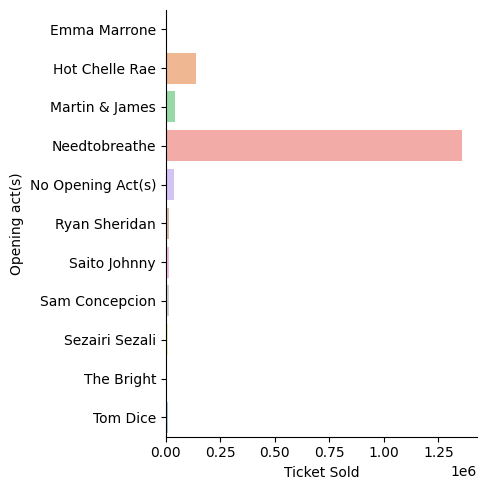

In [89]:
sns.catplot(data=result, y="Opening act(s)", x="Ticket Sold", kind="bar", palette="pastel")

### Red (Mar 13, 2013 – Jun 12, 2014)


In [90]:
show_counts = red['Opening act(s)'].value_counts().reset_index()
show_counts.columns = ['Opening act(s)', 'Total Shows']

# Calculate the total ticket sold for each opening act
total_ticket_sold = red.groupby('Opening act(s)')['Ticket Sold'].sum().reset_index()

# Merge the total show and total ticket sold dataframes
result = pd.merge(total_ticket_sold, show_counts, on='Opening act(s)')

# Calculate the weighted average for each opening act
result['Weighted_Avg'] = (result['Ticket Sold'] * result['Total Shows']) / result['Total Shows'].sum()

# Display the result
print(result)

          Opening act(s)  Ticket Sold  Total Shows  Weighted_Avg
0        Andreas Bourani     10350.00            1         85.54
1          Austin Mahone    634359.00           10      52426.36
2         Brett Eldredge    295874.00           14      34233.36
3                    CTS     20046.00            1        165.67
4            Casey James    319350.00           14      36949.59
5             Ed Sheeran   1363510.00           47     529627.85
6   Florida Georgia Line    186157.00            8      12307.90
7          Guy Sebastian    148921.00            4       4923.01
8               IamNeeta      7525.00            1         62.19
9             Imprompt-3     16344.00            1        135.07
10           Joel Crouse    562129.00           11      51102.64
11            Meg Bucsit      9775.00            1         80.79
12            Neon Trees    179720.00            5       7426.45
13        Nicole Zefanya      8130.00            1         67.19
14     No Opening Act(s) 

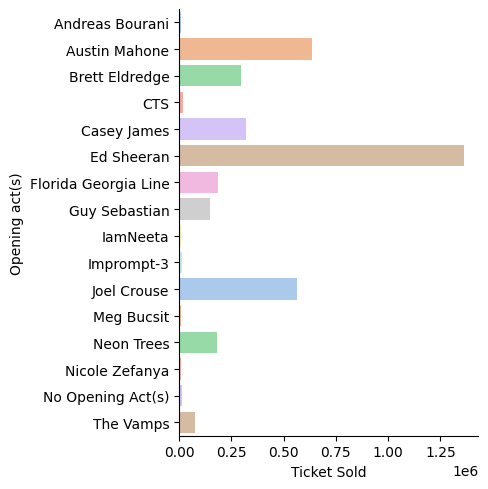

In [91]:
sns.catplot(data=result, y="Opening act(s)", x="Ticket Sold", kind="bar", palette="pastel")

### **1989 (May 15, 2015 - Dec 12, 2015)**


In [92]:
the1989.isna().sum()

City                0
Country             0
Venue               0
Opening act(s)      0
Revenue             0
Tour                0
Ticket Sold         0
Ticket Available    0
dtype: int64

In [93]:
show_counts = the1989['Opening act(s)'].value_counts().reset_index()
show_counts.columns = ['Opening act(s)', 'Total Shows']

# Calculate the total ticket sold for each opening act
total_ticket_sold = the1989.groupby('Opening act(s)')['Ticket Sold'].sum().reset_index()

# Merge the total show and total ticket sold dataframes
result = pd.merge(total_ticket_sold, show_counts, on='Opening act(s)')

# Calculate the weighted average for each opening act
result['Weighted_Avg'] = (result['Ticket Sold'] * result['Total Shows']) / result['Total Shows'].sum()

# Display the result
print(result)

      Opening act(s)  Ticket Sold  Total Shows  Weighted_Avg
0               Haim    551245.00            7      48844.49
1          James Bay     40186.00            2       1017.37
2  No Opening Act(s)    220583.28            5      13960.97
3       Shawn Mendes   1237951.00           17     266394.52
4          Vance Joy   2082657.00           48    1265411.85


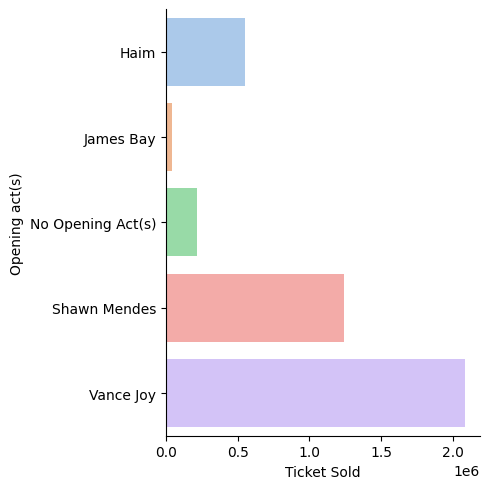

In [94]:
sns.catplot(data=result, y="Opening act(s)", x="Ticket Sold", kind="bar", palette="pastel")

### **Reputation (May 8, 2018 – Nov 21, 2018)**

In [95]:
show_counts = reputation['Opening act(s)'].value_counts().reset_index()
show_counts.columns = ['Opening act(s)', 'Total Shows']

# Calculate the total ticket sold for each opening act
total_ticket_sold = reputation.groupby('Opening act(s)')['Ticket Sold'].sum().reset_index()

# Merge the total show and total ticket sold dataframes
result = pd.merge(total_ticket_sold, show_counts, on='Opening act(s)')

# Calculate the weighted average for each opening act
result['Weighted_Avg'] = (result['Ticket Sold'] * result['Total Shows']) / result['Total Shows'].sum()

# Display the result
print(result)

   Opening act(s)  Ticket Sold  Total Shows  Weighted_Avg
0          Broods    266379.00            5      19027.07
1  Camila Cabello   2466407.00           29    1021797.19
2      Charli XCX   2888916.00           36    1485728.23


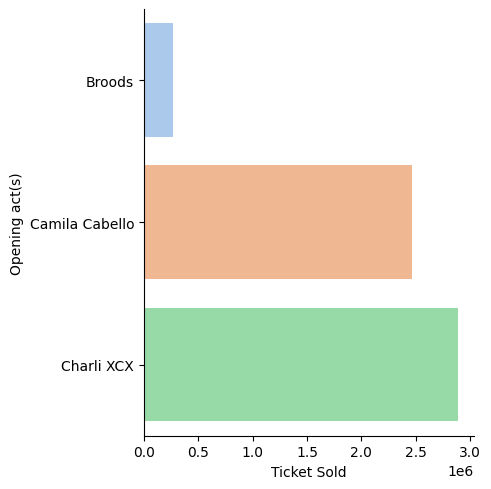

In [96]:
sns.catplot(data=result, y="Opening act(s)", x="Ticket Sold", kind="bar", palette="pastel")

In [97]:
no_opening_acts = taylor_df[taylor_df['Opening act(s)'] == "No Opening Act(s)"]
have_opening_acts = taylor_df[taylor_df['Opening act(s)'] != "No Opening Act(s)"]

# Calculate total revenue for each case
total_revenue_no_opening = no_opening_acts['Revenue'].sum()
total_revenue_with_opening = have_opening_acts['Revenue'].sum()

# Calculate average revenue for each case
average_revenue_no_opening = no_opening_acts['Revenue'].mean()
average_revenue_with_opening = have_opening_acts['Revenue'].mean()

# Print the results
print("Total revenue when there were no opening acts:", total_revenue_no_opening)
print("Total revenue when there were opening acts:", total_revenue_with_opening)
print("Average revenue when there were no opening acts:", average_revenue_no_opening)
print("Average revenue when there were opening acts:", average_revenue_with_opening)

Total revenue when there were no opening acts: 72689174.81911263
Total revenue when there were opening acts: 967456564.4300342
Average revenue when there were no opening acts: 2907566.992764505
Average revenue when there were opening acts: 3182422.909309323
